### Final Project GEOS 505: Thomas Robbins
##### The single most used material for construction of civil infrastructure is reinforced concrete. The versatility and use of this material ranges from simple applications such as sidewalks, to highly complex applications such as dams and high-rise buildings. To ensure that the concrete is being designed to required specifications, several intermediate controls are used to verify and test quality assurance and quality control (QA/QC). The first method to implement QA/QC is the engineered mix design. The second method is in place testing. Testing is performed through several methods which include slump test, entrained air test, and compressive strength testing. Testing is used to ensure development of proper strength properties for each application. For the purpose of this project I intend to collect test results data from a federal agency, then identify the statistical variance between the design parameters and the final design strength given in the data. Considering the variability of mix designs, placement methods and environmental factors, test results should show similar variability. Given the importance of the strength parameters the concrete should not vary less than the given design. From basic statistical analysis, I should be able to produce a graph that identifies the strength parameters of the mix, and correlate the results with the input variables such as outside air temperature, slump test results, entrained air and unit weight of the concrete. If properly assessed, the potential of this work could make reasonable predictions of mix design strength parameters, given variation of input values. Further, Monte Carlo simulation will be performed on given data and a probability density function of the results will then be used assess at what confidence a prediction can be made. Results and analysis methods are subject to change given the complexity and availability of selected data.

##### The first step was to import the required libraries to read the input file 

In [1]:
# The first step is to load certain librarys within python that will be used for reading a csv file. 
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

#### Next step was to use pandas to read the csv file. In order to properly read some of the values, I had to truncate the values in certain cells. This was due to the file containing a degree symbol and unit written with each temperature value. 

In [2]:
data = pd.read_csv('Mix_Design_V2.0.csv',converters={"Air_Temp": lambda x: x[:2],"Concrete_Temp": lambda x: x[:2]})
data[0:8]

,PlacementDate,QA_QC,Report #,TicketNum,TestNum,Cyl_ID,Location,Neat_line_Vc,Actual_Vc,Waste_Vc,...,Early,Perc_Design,sevenDay,Perc_Design_seven,tenDay,perc_Design_ten,twoeight_Day,Perc_DesignTwoEight,fiveSix_Day,perc_Design_fivesix
0,43234,QC,NaN,15812,1,NaN,"RB 16, 17",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43234,QC,NaN,15812,2,1,"RB 16, 17",NaN,NaN,NaN,...,2040.0,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43234,QC,NaN,15812,2,2,"RB 16, 17",NaN,NaN,NaN,...,2140.0,0.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43234,QC,NaN,15812,2,3,"RB 16, 17",NaN,NaN,NaN,...,NaN,NaN,2950.0,0.66,NaN,NaN,NaN,NaN,NaN,NaN
4,43234,QC,NaN,15812,2,4,"RB 16, 17",NaN,NaN,NaN,...,NaN,NaN,2770.0,0.62,NaN,NaN,NaN,NaN,NaN,NaN
5,43234,QC,NaN,15812,2,5,"RB 16, 17",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3130.0,0.70,NaN,NaN,NaN,NaN
6,43234,QC,NaN,15812,2,6,"RB 16, 17",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3120.0,0.69,NaN,NaN,NaN,NaN
7,43234,QC,NaN,15812,2,7,"RB 16, 17",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4530.0,1.01,NaN,NaN


#### From the displayed table in the previous line, the cells that do not contain values are represented as NaN. Also, the temperature values are being read as characters and not numeric values. The following code is an attempt to correct these issues. 

In [3]:
AirTemp = data['Air_Temp'].values
AirTemp = pd.to_numeric(AirTemp)
AirTemp[0:8]

array([nan, 79., 79., 79., 79., 79., 79., 79.])

In [4]:
ConTemp = data['Concrete_Temp'].values
ConTemp = pd.to_numeric(ConTemp)
ConTemp[0:8]

array([73., 69., 69., 69., 69., 69., 69., 69.])

##### Next I needed to insert the new numeric temperature values to the entire data set.

In [5]:
data['Air_Temp'] = AirTemp
data['Concrete_Temp'] = ConTemp

##### After all the values were properly identified as numeric, I inserted zeros everywhere a 'NaN' value was reported. 

In [6]:
Data = data.fillna(0)
airtemp = Data['Air_Temp'].values
Data[0:6]

,PlacementDate,QA_QC,Report #,TicketNum,TestNum,Cyl_ID,Location,Neat_line_Vc,Actual_Vc,Waste_Vc,...,Early,Perc_Design,sevenDay,Perc_Design_seven,tenDay,perc_Design_ten,twoeight_Day,Perc_DesignTwoEight,fiveSix_Day,perc_Design_fivesix
0,43234,QC,0,15812,1,0,"RB 16, 17",0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,43234,QC,0,15812,2,1,"RB 16, 17",0.0,0.0,0.0,...,2040.0,0.45,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,43234,QC,0,15812,2,2,"RB 16, 17",0.0,0.0,0.0,...,2140.0,0.48,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,43234,QC,0,15812,2,3,"RB 16, 17",0.0,0.0,0.0,...,0.0,0.00,2950.0,0.66,0.0,0.0,0.0,0.0,0.0,0.0
4,43234,QC,0,15812,2,4,"RB 16, 17",0.0,0.0,0.0,...,0.0,0.00,2770.0,0.62,0.0,0.0,0.0,0.0,0.0,0.0
5,43234,QC,0,15812,2,5,"RB 16, 17",0.0,0.0,0.0,...,0.0,0.00,0.0,0.00,3130.0,0.7,0.0,0.0,0.0,0.0


##### Next, I 

In [7]:
print(Data.describe())

       PlacementDate      TicketNum     TestNum  Neat_line_Vc   Actual_Vc  \
count     898.000000     898.000000  898.000000    898.000000  898.000000   
mean    42975.458797   14730.514477    1.758352      0.642572    0.804009   
std        94.074113   13934.329070    0.699229      4.373022    5.471677   
min     42880.000000   10912.000000    1.000000      0.000000    0.000000   
25%     42941.250000   11757.000000    1.000000      0.000000    0.000000   
50%     42955.000000   12234.000000    2.000000      0.000000    0.000000   
75%     42964.000000   12617.000000    2.000000      0.000000    0.000000   
max     43326.000000  157193.000000    4.000000     30.370000   38.000000   

       Waste_Vc   Design_PSI    slump_in    Perc_Air    Air_Temp  \
count     898.0   898.000000  898.000000  898.000000  898.000000   
mean        0.0  4436.530067    6.826837    0.058928   69.760579   
std         0.0   302.133779    1.894132    0.017942   15.400688   
min         0.0  3000.000000    0.

##### Next, I verified that the csv file was formatted to well enough to perform statistical operations. Noting there are several columns in the file that are not required for computations, I created new data frames. One for the input variables, one for the output strength, and another that had both. 

In [8]:
Data_vars = Data[['slump_in','Perc_Air','Air_Temp','Concrete_Temp']]
Data_strength = Data[['Design_PSI','sevenDay','tenDay','twoeight_Day','fiveSix_Day']]
DataTrunc = Data[['slump_in','Perc_Air','Air_Temp','Concrete_Temp','Design_PSI','sevenDay','tenDay','twoeight_Day']]

##### After setting the new data frame to have only the specific variables that I required, I attempted to plot a graphical representation on the basic statistical parameters for each variable. Note here that there is a clear issue with the results, as the zeros that I previously inserted into the csv file have skewed the data so that the mean and standard deviations are incorrect. 

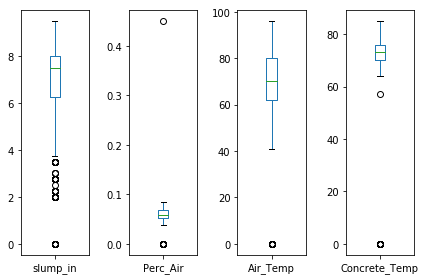

In [9]:
Data_vars.plot(kind='box', subplots=True)
plt.tight_layout()

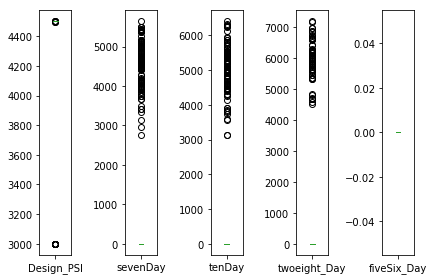

In [10]:
Data_strength.plot(kind='box', subplots=True)
plt.tight_layout()

#### To correct the issue of the zeros skewing the results, I needed to select the particular rows that contained actual results data. This was cumbersome as the each column has zeros, and the actual result values are offset in the csv file. This means that I could not just run one line of code to eliminate rows with zeros, as all rows would be neglected. I had to select rows based on which column value I wanted, then use these as new indexed data frames to run statistical parameters on. 

In [11]:
slump = Data.loc[Data['slump_in'] !=0]
percAir = Data.loc[Data['Perc_Air'] !=0]
tempAir = Data.loc[Data['Air_Temp'] !=0]
tempCon = Data.loc[Data['Concrete_Temp'] !=0]

In [12]:
early = Data.loc[Data['Early'] != 0]  
day7 = Data.loc[Data['sevenDay'] != 0]
day10 = Data.loc[Data['tenDay'] != 0]
day28 = Data.loc[Data['twoeight_Day'] != 0]
day56 = Data.loc[Data['fiveSix_Day'] != 0]

##### Now that the values are neglecting the many zeros within the data frame, I can print new box plots. 

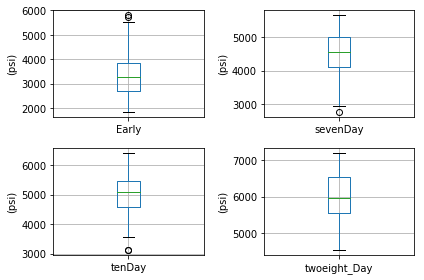

In [13]:
fig = plt.figure()

plt.subplot(2, 2, 2)
plt.ylabel('(psi)')
day7.boxplot(column='sevenDay')

plt.subplot(2, 2, 3)
plt.ylabel('(psi)')
day10.boxplot(column='tenDay')

plt.subplot(2, 2, 4)
plt.ylabel('(psi)')
day28.boxplot(column='twoeight_Day')

plt.subplot(2, 2, 1)
plt.ylabel('(psi)')
early.boxplot(column='Early')

plt.tight_layout()

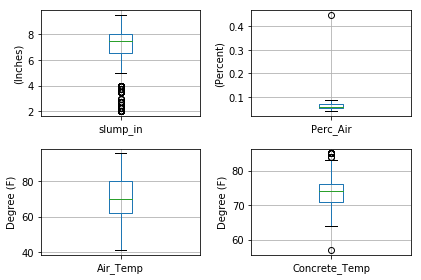

In [14]:

fig = plt.figure()

plt.subplot(2, 2, 1)
plt.ylabel('(Inches)')
slump.boxplot(column='slump_in')

plt.subplot(2, 2, 2)
plt.ylabel('(Percent)')
percAir.boxplot(column='Perc_Air')

plt.subplot(2, 2, 3)
plt.ylabel('Degree (F)')
tempAir.boxplot(column='Air_Temp')

plt.subplot(2, 2, 4)
plt.ylabel('Degree (F)')
tempCon.boxplot(column='Concrete_Temp')

plt.tight_layout()

In [15]:
print('7-day_max =',day7['sevenDay'].max());
print('7-day_min =',day7['sevenDay'].min());
print('7-day_StdDev=',day7['sevenDay'].std())

('7-day_max =', 5650.0)
('7-day_min =', 2770.0)
('7-day_StdDev=', 598.9919447187094)


##### Now that the variables are able to be used to compute the required statistics, a new issue arises. In order to bring everything into one input variable, I will have to append all the new, zero-absent, data frames into one unified index. This will cause problems as all the zeros will be reinserted. Currently, I use "DataTrunc" as the input index, and that has zeros. Which produces very boxy boxes. 

In [16]:
# This section of code is used to import additional libraries
import scipy
import sklearn

In [17]:
# This code loads additional regression libraries
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [18]:
# Split-out validation dataset
# Note: Wrong input values. DataTrunc has zeros in it. 
array = DataTrunc.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [19]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [20]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.972164 (0.013870)
LDA: 0.970775 (0.011507)
KNN: 0.983314 (0.021334)
CART: 0.986111 (0.016434)
NB: 0.947124 (0.019361)
SVM: 0.980516 (0.009190)


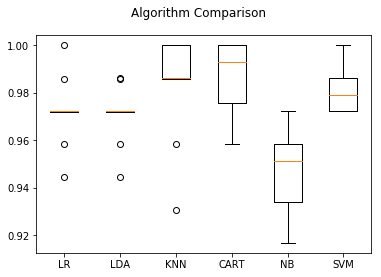

In [21]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [22]:
# Make predictions on validation dataset
# this doesn't work very well. 
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
# print(accuracy_score(Y_validation, predictions))
# print(confusion_matrix(Y_validation, predictions))
# print(classification_report(Y_validation, predictions))

In [23]:
print(accuracy_score(Y_validation, predictions))

0.9555555555555556


In [24]:
print(confusion_matrix(Y_validation, predictions))

[[  5   0   3   0]
 [  0   0   1   0]
 [  3   0 167   0]
 [  0   0   1   0]]


In [25]:
print(classification_report(Y_validation, predictions))

             precision    recall  f1-score   support

     3000.0       0.62      0.62      0.62         8
     4499.0       0.00      0.00      0.00         1
     4500.0       0.97      0.98      0.98       170
     4503.0       0.00      0.00      0.00         1

avg / total       0.94      0.96      0.95       180



C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
Data_Var = [slump,percAir,tempAir,tempCon]
print(Data_Var)

[     PlacementDate QA_QC Report #  TicketNum  TestNum Cyl_ID  \
0            43234    QC        0      15812        1      0   
1            43234    QC        0      15812        2      1   
2            43234    QC        0      15812        2      2   
3            43234    QC        0      15812        2      3   
4            43234    QC        0      15812        2      4   
5            43234    QC        0      15812        2      5   
6            43234    QC        0      15812        2      6   
7            43234    QC        0      15812        2      7   
8            43234    QC        0      15812        2      8   
9            43234    QC        0      15812        2      9   
10           43234    QC        0      15812        2     10   
11           43241    QC        0      15918        1      0   
12           43241    QC        0      15918        2      1   
13           43241    QC        0      15918        2      2   
14           43241    QC        0      